#### Creating Labels

In [2]:
import numpy as np
import pandas as pd
import os

In [1]:
labels_csv = {'train': "/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Notebooks/weekly_supervised/new_image_labels_train.csv",
             'test': "/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/annotations/image_labels_test.csv"
             }

In [16]:
train_csv

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
0,000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00053190460d56c53cc3e57321387478,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0005e8e3701dfb1dd93d53e2ff537b6e,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0007d316f756b3fa0baea2ff514ce945,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ffe6f9fe648a7ec29a50feb92d6c15a4,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14996,ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14997,ffeffc54594debf3716d6fcd2402a99f,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14998,fff0f82159f9083f3dd1f8967fc54f6a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train_csv = pd.read_csv(labels_csv['train'])
test_csv = pd.read_csv(labels_csv['test'])

In [55]:
new_train = pd.DataFrame(columns=['image_id', 'Abnormal'])
new_train['image_id'] = train_csv['image_id']
new_train['Abnormal'] = 0

In [56]:
for i in train_csv.index:
    if train_csv.loc[i]['No finding'] == 0:
        new_train.loc[i,'Abnormal'] = 1
new_train.to_csv("./train_normal_vs_abnormal.csv", index= False)

In [57]:
new_test = pd.DataFrame(columns=['image_id', 'Abnormal'])
new_test['image_id'] = test_csv['image_id']
new_test['Abnormal'] = 0
for i in test_csv.index:
    if test_csv.loc[i]['No finding'] == 0:
        new_test.loc[i,'Abnormal'] = 1
new_test.to_csv("./test_normal_vs_abnormal.csv", index= False)

<AxesSubplot:xlabel='Abnormal'>

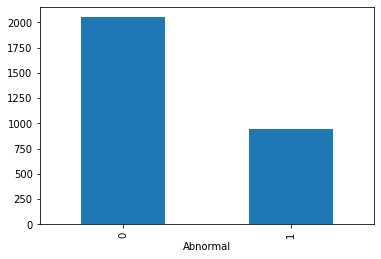

In [59]:
new_test.groupby(['Abnormal']).count().plot(kind = 'bar', legend = False)

<AxesSubplot:xlabel='Abnormal'>

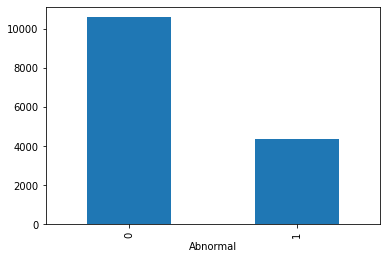

In [60]:
new_train.groupby(['Abnormal']).count().plot(kind = 'bar', legend = False)

In [ ]:
import numpy as np
import torch
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
torch.manual_seed(0)
from glob import glob

In [ ]:
train_csv = pd.read_csv("")